In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from gdown import download
download(fuzzy=True, url='https://drive.google.com/file/d/1yIzAbE46PuxTEIiutSY_2VsL5SiW6xAC/view?usp=sharing')

Downloading...
From: https://drive.google.com/uc?id=1yIzAbE46PuxTEIiutSY_2VsL5SiW6xAC
To: /content/datasetttt.csv
100%|██████████| 153k/153k [00:00<00:00, 73.6MB/s]


'datasetttt.csv'

In [3]:
df = pd.read_csv('/content/datasetttt.csv')
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


In [4]:
df = df.drop(columns=['Movement_During_Sleep','Sleep_Quality_Score', 'Caffeine_Intake_mg',	'Stress_Level',	'Bedtime_Consistency',	'Light_Exposure_hours'])
df

,Heart_Rate_Variability,Body_Temperature,Sleep_Duration_Hours
0,79.934283,37.199678,4.638289
1,67.234714,36.962317,6.209422
2,82.953771,36.529815,6.879592
3,100.460597,36.176532,10.331531
4,65.316933,36.849112,8.334830
...,...,...,...
995,64.377994,37.035075,7.542686
996,105.953731,36.486739,4.383282
997,82.816857,36.059063,7.019553
998,58.576420,36.418467,9.965067


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Sleep_Duration_Hours    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

,0
Heart_Rate_Variability,0
Body_Temperature,0
Sleep_Duration_Hours,0


In [8]:
df.describe()

,Heart_Rate_Variability,Body_Temperature,Sleep_Duration_Hours
count,1000.000000,1000.000000,1000.000000
mean,70.386641,36.535418,7.471921
std,19.584319,0.498727,1.540699
min,5.174653,35.029806,3.105827
25%,57.048194,36.196879,6.393869
50%,70.506012,36.531539,7.500277
75%,82.958878,36.864441,8.500418
max,147.054630,38.096554,12.364639


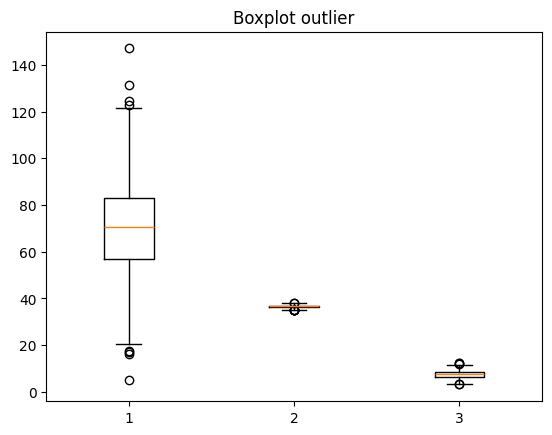

In [9]:
plt.boxplot(df)
plt.title("Boxplot outlier")
plt.show()

In [10]:
# Hitung Q1 (kuartil bawah) dan Q3 (kuartil atas)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df < batas_bawah) | (df > batas_atas)]


In [11]:
jumlah_outliers_per_kolom = outliers.sum()

print("Jumlah outlier per kolom:")
print(jumlah_outliers_per_kolom)

Jumlah outlier per kolom:
Heart_Rate_Variability    581.505893
Body_Temperature          286.574412
Sleep_Duration_Hours       42.640674
dtype: float64


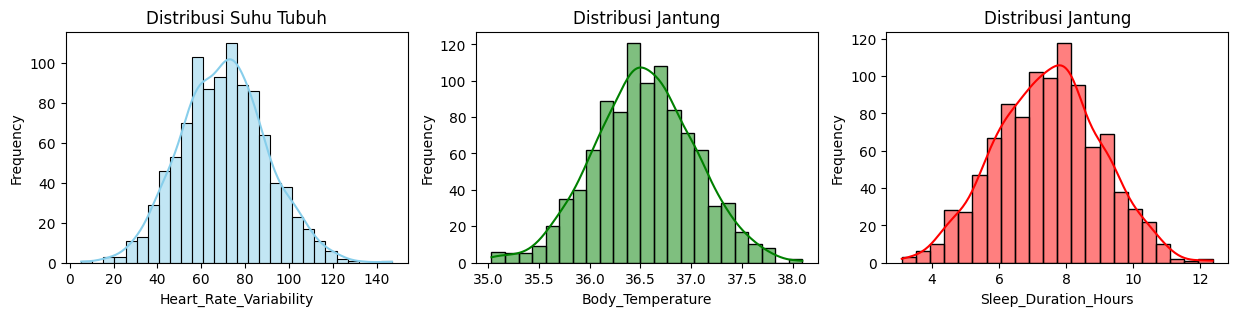

In [12]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.histplot(df['Heart_Rate_Variability'], kde=True, color='skyblue')
plt.xlabel('Heart_Rate_Variability')
plt.ylabel('Frequency')
plt.title('Distribusi Suhu Tubuh')

plt.subplot(1, 3, 2)
sns.histplot(df['Body_Temperature'], kde=True, color='green')
plt.xlabel('Body_Temperature')
plt.ylabel('Frequency')
plt.title('Distribusi Jantung')

plt.subplot(1, 3, 3)
sns.histplot(df['Sleep_Duration_Hours'], kde=True, color='red')
plt.xlabel('Sleep_Duration_Hours')
plt.ylabel('Frequency')
plt.title('Distribusi Jantung')

plt.show()

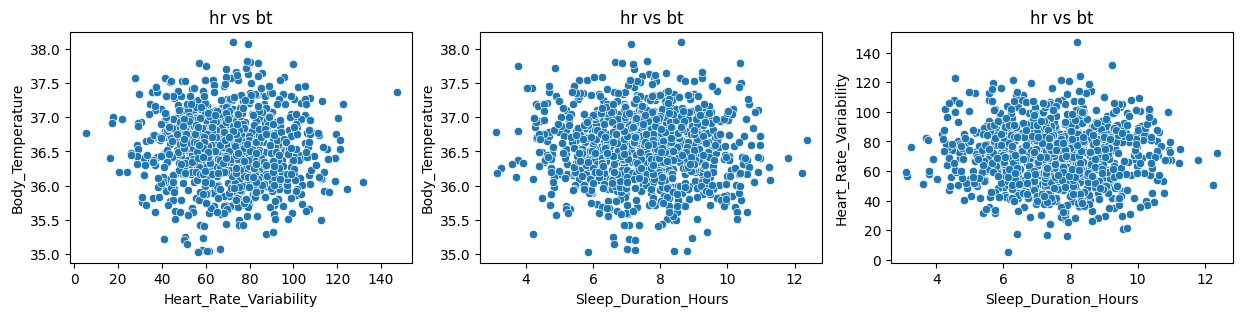

In [13]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Heart_Rate_Variability', y='Body_Temperature', data=df)
plt.xlabel('Heart_Rate_Variability')
plt.ylabel('Body_Temperature')
plt.title('hr vs bt')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Sleep_Duration_Hours', y='Body_Temperature', data=df)
plt.xlabel('Sleep_Duration_Hours')
plt.ylabel('Body_Temperature')
plt.title('hr vs bt')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Sleep_Duration_Hours', y='Heart_Rate_Variability', data=df)
plt.xlabel('Sleep_Duration_Hours')
plt.ylabel('Heart_Rate_Variability')
plt.title('hr vs bt')

plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [15]:
X = df[['Heart_Rate_Variability',
        'Body_Temperature',
        'Sleep_Duration_Hours'
      ]].to_numpy()

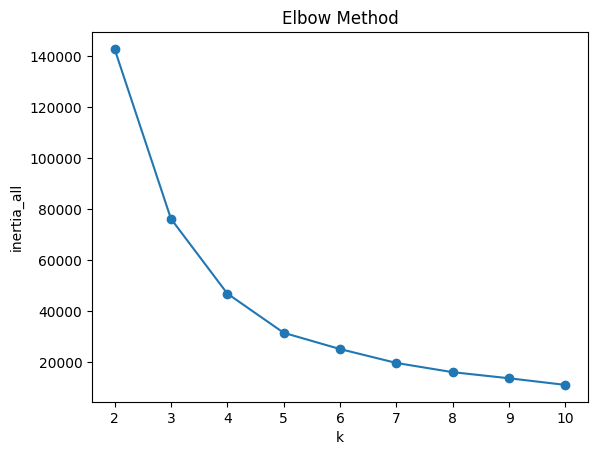

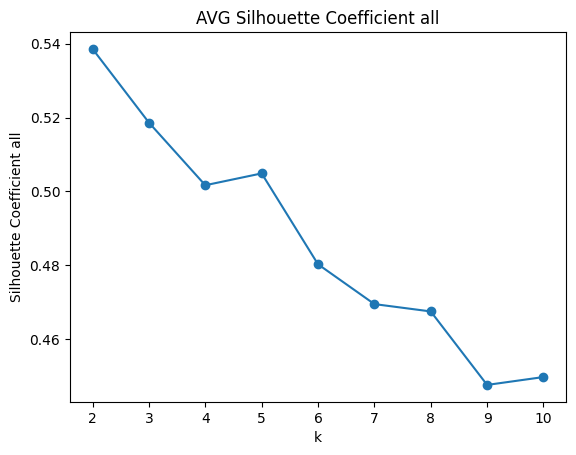

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_all = []
silhouette_coefficients_all = []
K = range(2,11)
for k in K:
    kmeans_model = KMeans(n_clusters=k , random_state=42 ).fit(X)
    inertia_all.append(kmeans_model.inertia_)
    score = silhouette_score(X, kmeans_model.labels_,  metric='euclidean')
    silhouette_coefficients_all.append(score)

plt.plot(K, inertia_all, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel('inertia_all')
plt.title('Elbow Method')
plt.show()

plt.plot(K, silhouette_coefficients_all, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel("Silhouette Coefficient all")
plt.title("AVG Silhouette Coefficient all")
plt.show()

In [17]:
kmeans_model = KMeans(n_clusters=3).fit(X)

cluster_label_all = kmeans_model.labels_

cluster_centroids = kmeans_model.cluster_centers_

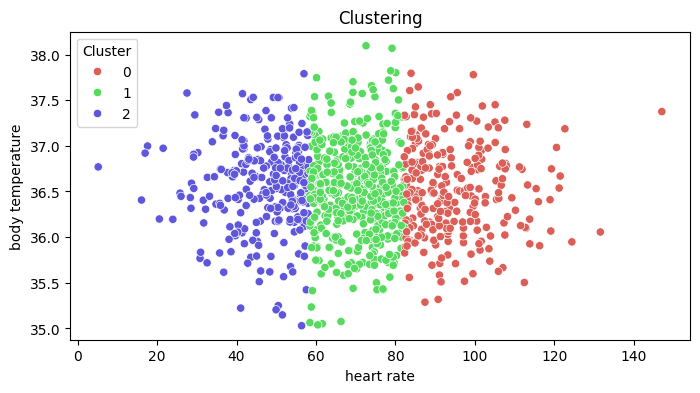

In [18]:
# Menghitung centroid dari data aktual untuk setiap cluster
df['Cluster'] = cluster_label_all
centroids = df.groupby('Cluster')[['Heart_Rate_Variability','Body_Temperature']].mean().values

# Scatterplot data cluster
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=df['Heart_Rate_Variability'],
    y=df['Body_Temperature'],
    hue=df['Cluster'],
    palette=sns.color_palette('hls', len(df['Cluster'].unique()))
)

# Menambahkan judul dan label
plt.title('Clustering')
plt.ylabel('body temperature')
plt.xlabel('heart rate')
plt.legend(title='Cluster')
plt.show()

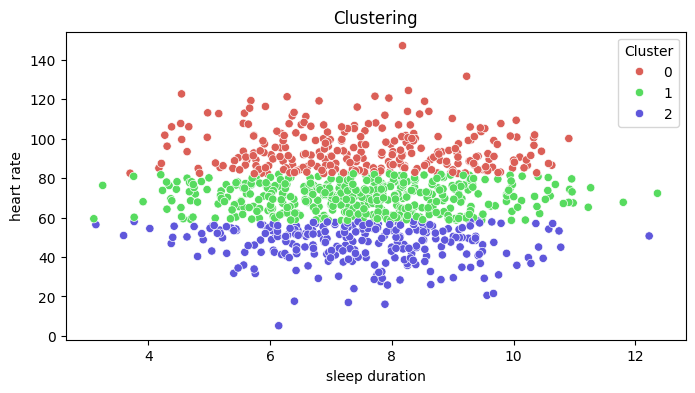

In [19]:
# Menghitung centroid dari data aktual untuk setiap cluster
df['Cluster'] = cluster_label_all
centroids = df.groupby('Cluster')[['Heart_Rate_Variability','Sleep_Duration_Hours']].mean().values

# Scatterplot data cluster
plt.figure(figsize=(8, 4))
sns.scatterplot(
    y=df['Heart_Rate_Variability'],
    x=df['Sleep_Duration_Hours'],
    hue=df['Cluster'],
    palette=sns.color_palette('hls', len(df['Cluster'].unique()))
)

# Menambahkan judul dan label
plt.title('Clustering')
plt.xlabel('sleep duration')
plt.ylabel('heart rate')
plt.legend(title='Cluster')
plt.show()

In [20]:
df_baru = df.copy()

In [21]:
df_baru['Cluster']=cluster_label_all

In [22]:
df_baru

,Heart_Rate_Variability,Body_Temperature,Sleep_Duration_Hours,Cluster
0,79.934283,37.199678,4.638289,1
1,67.234714,36.962317,6.209422,1
2,82.953771,36.529815,6.879592,0
3,100.460597,36.176532,10.331531,0
4,65.316933,36.849112,8.334830,1
...,...,...,...,...
995,64.377994,37.035075,7.542686,1
996,105.953731,36.486739,4.383282,0
997,82.816857,36.059063,7.019553,0
998,58.576420,36.418467,9.965067,1


In [23]:
df_baru['Cluster'].value_counts()

,count
Cluster,
1,459
0,272
2,269


In [24]:
X_baru = df[['Heart_Rate_Variability',
        'Body_Temperature',
        'Sleep_Duration_Hours'
      ]].to_numpy()

y_baru = df_baru['Cluster'].to_numpy()

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Jumlah data sebelum SMOTE:", len(X_train))
print("Jumlah data setelah SMOTE:", len(X_train_resampled))
print("Distribusi kelas setelah SMOTE:")
print(dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Jumlah data sebelum SMOTE: 800
Jumlah data setelah SMOTE: 1110
Distribusi kelas setelah SMOTE:
{0: 370, 1: 370, 2: 370}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [27]:
df_resampled = pd.DataFrame(X_train_resampled, columns=['Heart_Rate_Variability', 'Body_Temperature', 'Sleep_Duration_Hours'])
df_resampled['Cluster'] = y_train_resampled

In [28]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1110 non-null   float64
 1   Body_Temperature        1110 non-null   float64
 2   Sleep_Duration_Hours    1110 non-null   float64
 3   Cluster                 1110 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 30.5 KB


In [29]:
df_resampled['Cluster'].value_counts()

,count
Cluster,
1,370
0,370
2,370


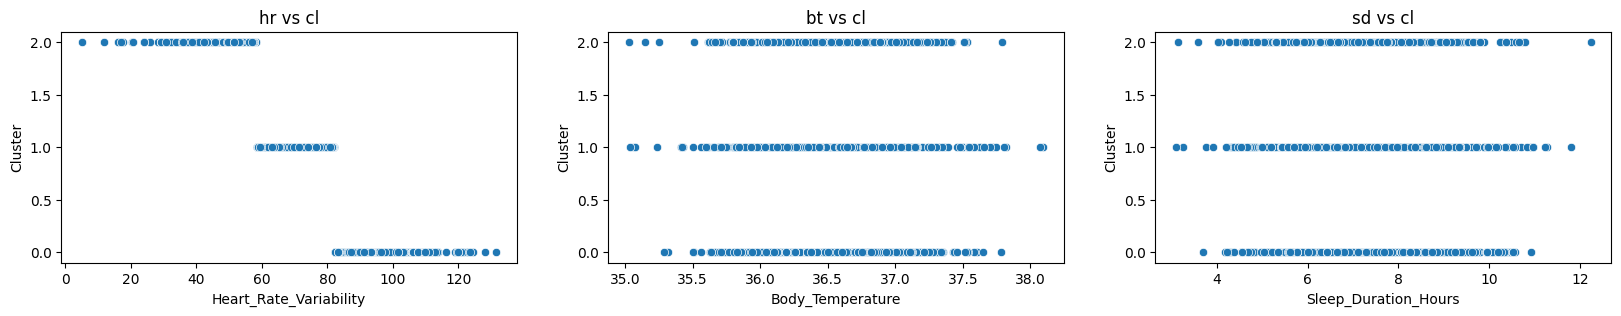

In [30]:
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Heart_Rate_Variability', y='Cluster', data=df_resampled)
plt.xlabel('Heart_Rate_Variability')
plt.ylabel('Cluster')
plt.title('hr vs cl')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Body_Temperature', y='Cluster', data=df_resampled)
plt.xlabel('Body_Temperature')
plt.ylabel('Cluster')
plt.title('bt vs cl')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Sleep_Duration_Hours', y='Cluster', data=df_resampled)
plt.xlabel('Sleep_Duration_Hours')
plt.ylabel('Cluster')
plt.title('sd vs cl')

plt.show()

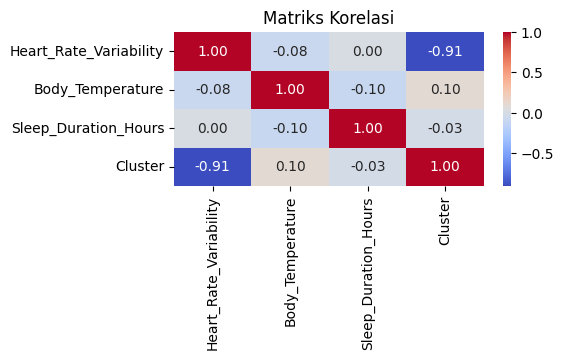

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_resampled.corr()

plt.figure(figsize=(5, 2))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriks Korelasi")
plt.show()


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x = df_resampled[['Heart_Rate_Variability', 'Body_Temperature', 'Sleep_Duration_Hours']]
y = df_resampled['Cluster']

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(x, y)

for i in range(len(fs.scores_)):
    print(f'Feature {i}: {fs.scores_[i]:.2f}')

features = fs.transform(x)

Feature 0: 2632.17
Feature 1: 5.42
Feature 2: 0.47


In [33]:
import pandas as pd
from scipy.stats import f_oneway

df['Cluster'] = df['Cluster'].astype('category')

anova_results = []

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column != 'Cluster':
        groups = [group[column].dropna() for _, group in df.groupby('Cluster')]

        f_stat, p_value = f_oneway(*groups)

        anova_results.append({
            'Kolom': column,
            'F-Statistic': f_stat,
            'p-value': p_value
        })
anova_df = pd.DataFrame(anova_results)
print("Hasil Uji ANOVA:")
print(anova_df)

significant_results = anova_df[anova_df['p-value'] < 0.05]
print("\nKolom dengan perbedaan signifikan terhadap Cluster:")
print(significant_results)

Hasil Uji ANOVA:
                    Kolom  F-Statistic   p-value
0  Heart_Rate_Variability  2042.773566  0.000000
1        Body_Temperature     1.320333  0.267513
2    Sleep_Duration_Hours     0.094208  0.910102

Kolom dengan perbedaan signifikan terhadap Cluster:
                    Kolom  F-Statistic  p-value
0  Heart_Rate_Variability  2042.773566      0.0


<ipython-input-33-8bdee0bf9e75>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[column].dropna() for _, group in df.groupby('Cluster')]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, KFold
import time

from sklearn.neighbors import KNeighborsClassifier

In [35]:
X = df_resampled[['Heart_Rate_Variability',
                  'Body_Temperature',
                  'Sleep_Duration_Hours'
                ]].to_numpy()

y = df_resampled['Cluster'].to_numpy()

Text(0, 0.5, 'Accuracy Score')

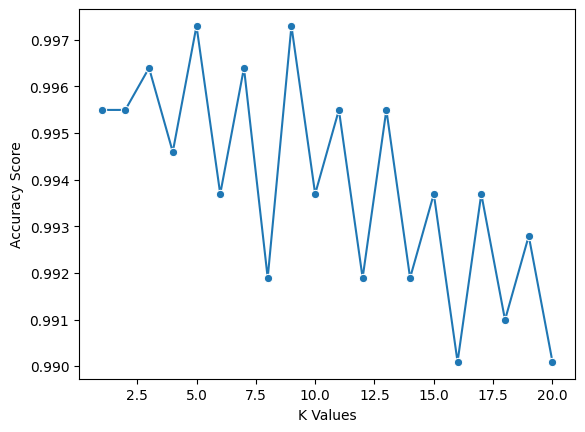

In [36]:
k_values = [i for i in range (1,21)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## 3 fitur

In [37]:
x = df_resampled[['Heart_Rate_Variability',
                  'Body_Temperature',
                  'Sleep_Duration_Hours'
                ]].to_numpy()

y = df_resampled['Cluster'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(x_train, y_train)
train_time = time.time() - start_time
y_pred_knn = knn.predict(x_test)

print("Model-test: KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}\n")

print(f"Waktu training: {train_time:.3f} detik")

y_pred_nn_t = knn.predict(x_train)

print("Model-train: KNN")
print(f"Accuracy: {accuracy_score(y_train, y_pred_nn_t):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_train, y_pred_nn_t, average='weighted'):.4f}\n")



kfold = KFold(n_splits=7, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(knn, x, y, cv=kfold, scoring=scoring)

print(f"Cross-validation Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Cross-validation Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Cross-validation Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Cross-validation F1 Score: {cv_results['test_f1'].mean():.4f}")

Model-test: KNN
Accuracy: 0.9955
Precision: 0.9956
Recall: 0.9955
F1 Score: 0.9955

Waktu training: 0.001 detik
Model-train: KNN
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1 Score: 0.9989

Cross-validation Accuracy: 0.9964
Cross-validation Precision: 0.9965
Cross-validation Recall: 0.9964
Cross-validation F1 Score: 0.9964


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.99      0.99        87
           2       1.00      1.00      1.00        76

    accuracy                           1.00       222
   macro avg       0.99      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



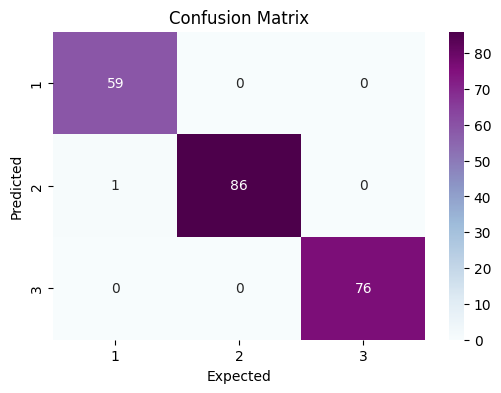

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=np.arange(1, cm.shape[1] + 1),
            yticklabels=np.arange(1, cm.shape[0] + 1))

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Expected')
plt.show()

## 2 fitur

In [39]:
x = df_resampled[['Heart_Rate_Variability',
                  'Body_Temperature',
                ]].to_numpy()

y = df_resampled['Cluster'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(x_train, y_train)
train_time = time.time() - start_time
y_pred_knn = knn.predict(x_test)

print("Model-test: KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}\n")

print(f"Waktu training: {train_time:.3f} detik")

y_pred_nn_t = knn.predict(x_train)

print("Model-train: KNN")
print(f"Accuracy: {accuracy_score(y_train, y_pred_nn_t):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_train, y_pred_nn_t, average='weighted'):.4f}\n")



kfold = KFold(n_splits=7, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(knn, x, y, cv=kfold, scoring=scoring)

print(f"Cross-validation Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Cross-validation Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Cross-validation Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Cross-validation F1 Score: {cv_results['test_f1'].mean():.4f}")

Model-test: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Waktu training: 0.003 detik
Model-train: KNN
Accuracy: 0.9977
Precision: 0.9978
Recall: 0.9977
F1 Score: 0.9977

Cross-validation Accuracy: 0.9982
Cross-validation Precision: 0.9983
Cross-validation Recall: 0.9982
Cross-validation F1 Score: 0.9982


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        76

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



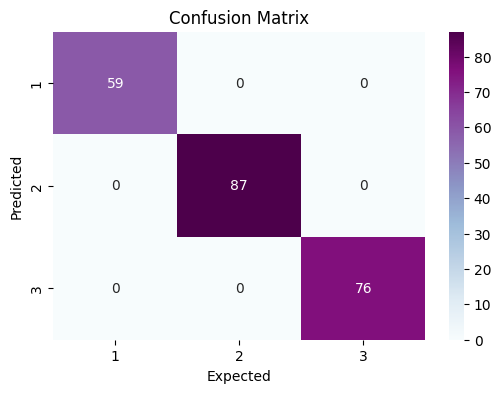

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=np.arange(1, cm.shape[1] + 1),
            yticklabels=np.arange(1, cm.shape[0] + 1))

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Expected')
plt.show()

## 1 fitur

In [41]:
x = df_resampled[['Heart_Rate_Variability'
                ]].to_numpy()

y = df_resampled['Cluster'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(x_train, y_train)
train_time = time.time() - start_time
y_pred_knn = knn.predict(x_test)

print("Model-test: KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}\n")

print(f"Waktu training: {train_time:.3f} detik")

y_pred_nn_t = knn.predict(x_train)

print("Model-train: KNN")
print(f"Accuracy: {accuracy_score(y_train, y_pred_nn_t):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_nn_t, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_train, y_pred_nn_t, average='weighted'):.4f}\n")



kfold = KFold(n_splits=7, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = cross_validate(knn, x, y, cv=kfold, scoring=scoring)

print(f"Cross-validation Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Cross-validation Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Cross-validation Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Cross-validation F1 Score: {cv_results['test_f1'].mean():.4f}")

Model-test: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Waktu training: 0.002 detik
Model-train: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Cross-validation Accuracy: 0.9982
Cross-validation Precision: 0.9983
Cross-validation Recall: 0.9982
Cross-validation F1 Score: 0.9982


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        76

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



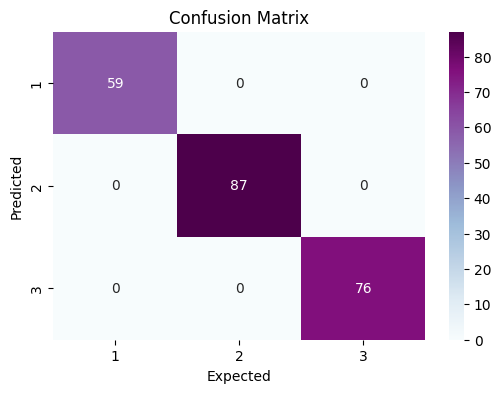

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=np.arange(1, cm.shape[1] + 1),
            yticklabels=np.arange(1, cm.shape[0] + 1))

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Expected')
plt.show()

## save pickle

In [43]:
x = df_resampled[['Heart_Rate_Variability'
                ]].to_numpy()

y = df_resampled['Cluster'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn_model_final = KNeighborsClassifier(n_neighbors=3)
knn_model_final.fit(x_train, y_train)

y_pred_knn_model_final = knn_model_final.predict(x_test)

In [44]:
import pickle

pkl_filename = "/content/model-final-tidur"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn_model_final, file)

In [45]:
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [49]:
new_data=[[100]]
model.predict(new_data)

array([0], dtype=int32)